In [4]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'panel'

In [5]:
import hvplot.pandas

ModuleNotFoundError: No module named 'hvplot'

In [6]:
load_dotenv("Resources/jfk.env")
MAPBOX_API_KEY = os.getenv("MAPBOX_API_KEY")

NameError: name 'load_dotenv' is not defined

In [7]:
file_path = Path("Resources/Asset_Prices_Month.csv") 
asset_data = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
asset_data.head()

NameError: name 'Path' is not defined

In [7]:
asset_data.dtypes

AMZN         float64
BA           float64
MSFT         float64
BTC          float64
Gold         float64
30 T-Bond    float64
dtype: object

In [8]:
asset_returns = asset_data.pct_change()
asset_returns.head()

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond
Date,,,,,,
2012-02-29,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-31,0.126996,-0.007738,0.016383,NaN,-0.024642,0.087662
2012-04-30,0.145129,0.032674,-0.007440,NaN,-0.004659,-0.068657
2012-05-31,-0.081889,-0.093620,-0.088382,NaN,-0.061386,-0.144231
2012-06-30,0.072519,0.067375,0.047962,NaN,0.025572,0.033708


In [9]:
file_path = Path("Resources/housing_prices_month_aggregate_clean.csv") 
housing_data = pd.read_csv(file_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
housing_data.head()

,Median Sale Price
Date,
2012-02-29,297736.8421
2012-03-31,300131.5789
2012-04-30,311921.0526
2012-05-31,324657.8947
2012-06-30,318684.2105


In [10]:
housing_data.dtypes

Median Sale Price    float64
dtype: object

In [24]:
all_assets = pd.concat([asset_data, housing_data], axis="columns", join="inner")
all_assets.head()

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond,Median Sale Price
Date,,,,,,,
2012-02-29,179.69,74.95,31.74,NaN,1716.6,3.08,297736.8421
2012-03-31,202.51,74.37,32.26,NaN,1674.3,3.35,300131.5789
2012-04-30,231.90,76.80,32.02,NaN,1666.5,3.12,311921.0526
2012-05-31,212.91,69.61,29.19,NaN,1564.2,2.67,324657.8947
2012-06-30,228.35,74.30,30.59,NaN,1604.2,2.76,318684.2105


In [11]:
housing_returns = housing_data.pct_change()
housing_returns.head()

,Median Sale Price
Date,
2012-02-29,NaN
2012-03-31,0.008043
2012-04-30,0.039281
2012-05-31,0.040834
2012-06-30,-0.018400


In [12]:
all_returns = pd.concat([asset_returns, housing_returns], axis="columns", join="inner")
all_returns.head()

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond,Median Sale Price
Date,,,,,,,
2012-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-31,0.126996,-0.007738,0.016383,NaN,-0.024642,0.087662,0.008043
2012-04-30,0.145129,0.032674,-0.007440,NaN,-0.004659,-0.068657,0.039281
2012-05-31,-0.081889,-0.093620,-0.088382,NaN,-0.061386,-0.144231,0.040834
2012-06-30,0.072519,0.067375,0.047962,NaN,0.025572,0.033708,-0.018400


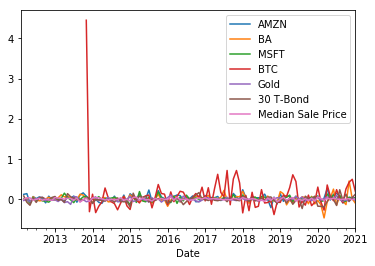

In [13]:
all_returns.plot()

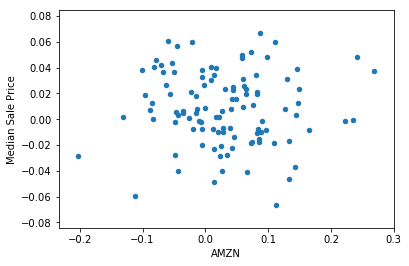

In [14]:
all_returns.plot(kind='scatter', x='AMZN', y='Median Sale Price')

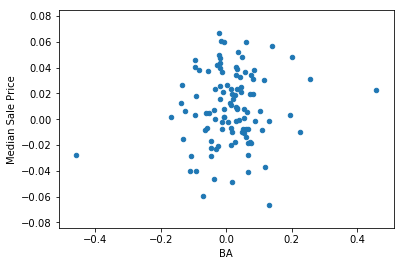

In [15]:
all_returns.plot(kind='scatter', x='BA', y='Median Sale Price')

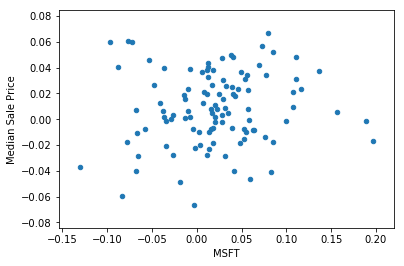

In [16]:
all_returns.plot(kind='scatter', x='MSFT', y='Median Sale Price')

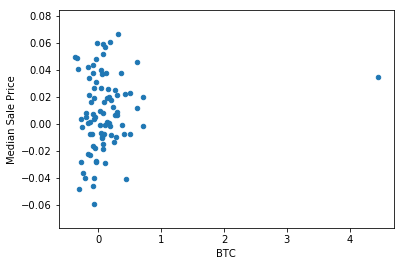

In [17]:
all_returns.plot(kind='scatter', x='BTC', y='Median Sale Price')

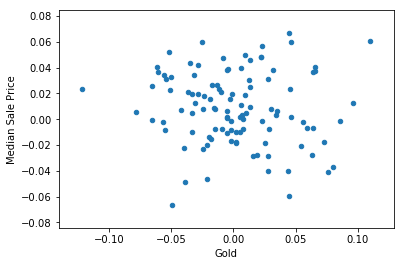

In [18]:
all_returns.plot(kind='scatter', x='Gold', y='Median Sale Price')

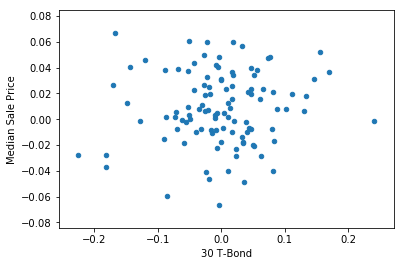

In [19]:
all_returns.plot(kind='scatter', x='30 T-Bond', y='Median Sale Price')

In [28]:
correlation = all_returns.corr()
correlation

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond,Median Sale Price
AMZN,1.000000,0.282400,0.470951,0.131068,0.059120,0.056182,-0.025773
BA,0.282400,1.000000,0.273241,0.085469,-0.104781,0.217059,0.122176
MSFT,0.470951,0.273241,1.000000,0.171341,-0.138826,0.239857,0.105895
BTC,0.131068,0.085469,0.171341,1.000000,-0.098619,0.055994,0.144325
Gold,0.059120,-0.104781,-0.138826,-0.098619,1.000000,-0.305347,-0.086502
30 T-Bond,0.056182,0.217059,0.239857,0.055994,-0.305347,1.000000,0.067305
Median Sale Price,-0.025773,0.122176,0.105895,0.144325,-0.086502,0.067305,1.000000


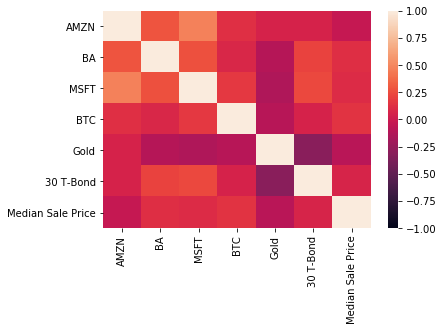

In [29]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [27]:
correlation_2 = all_assets.corr()
correlation_2

,AMZN,BA,MSFT,BTC,Gold,30 T-Bond,Median Sale Price
AMZN,1.000000,0.590124,0.982338,0.830743,0.482097,-0.699015,0.925388
BA,0.590124,1.000000,0.542075,0.411225,-0.137401,-0.116423,0.731449
MSFT,0.982338,0.542075,1.000000,0.833201,0.522869,-0.751674,0.900481
BTC,0.830743,0.411225,0.833201,1.000000,0.740757,-0.545785,0.781356
Gold,0.482097,-0.137401,0.522869,0.740757,1.000000,-0.607293,0.212930
30 T-Bond,-0.699015,-0.116423,-0.751674,-0.545785,-0.607293,1.000000,-0.615141
Median Sale Price,0.925388,0.731449,0.900481,0.781356,0.212930,-0.615141,1.000000


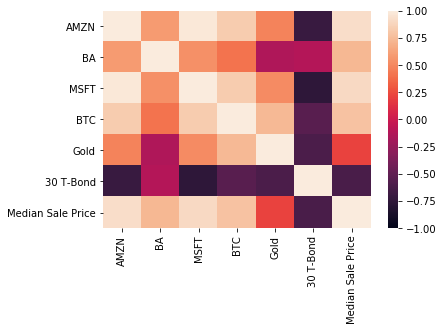

In [30]:
sns.heatmap(correlation_2, vmin=-1, vmax=1)

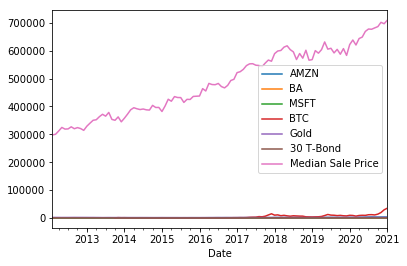

In [31]:
all_assets.plot()

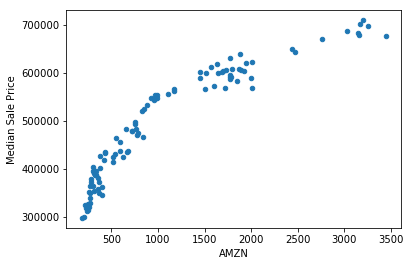

In [32]:
all_assets.plot(kind='scatter', x='AMZN', y='Median Sale Price')

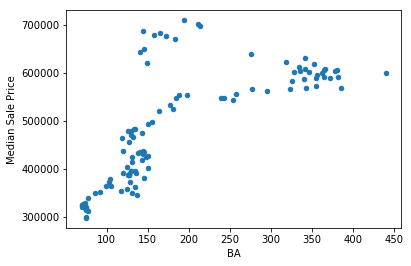

In [33]:
all_assets.plot(kind='scatter', x='BA', y='Median Sale Price')

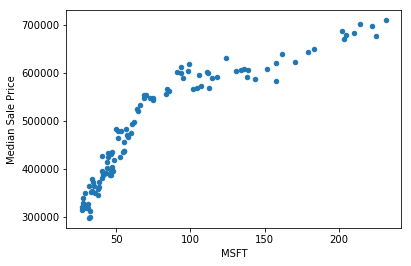

In [34]:
all_assets.plot(kind='scatter', x='MSFT', y='Median Sale Price')

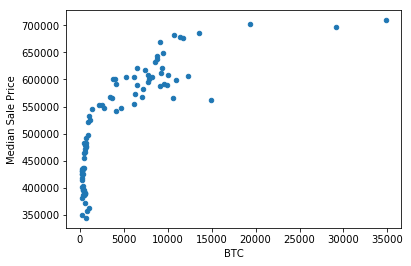

In [35]:
all_assets.plot(kind='scatter', x='BTC', y='Median Sale Price')

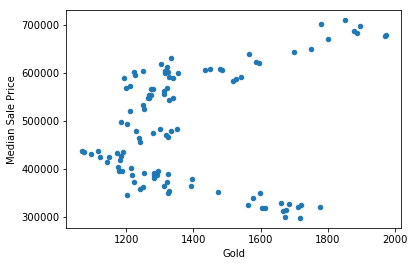

In [36]:
all_assets.plot(kind='scatter', x='Gold', y='Median Sale Price')

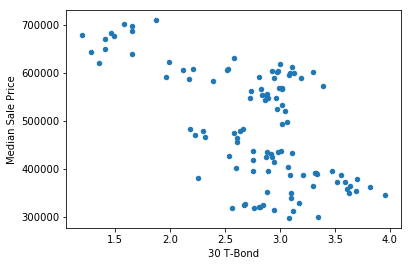

In [37]:
all_assets.plot(kind='scatter', x='30 T-Bond', y='Median Sale Price')

In [76]:
asset_data_refined = asset_data.drop(columns=["Gold", "BA", "30 T-Bond"])
asset_data_refined.head()

,AMZN,MSFT,BTC
Date,,,
2012-02-29,179.69,31.74,NaN
2012-03-31,202.51,32.26,NaN
2012-04-30,231.90,32.02,NaN
2012-05-31,212.91,29.19,NaN
2012-06-30,228.35,30.59,NaN


In [77]:
weights = [1/3, 1/3, 1/3]
asset_index = asset_data_refined.dot(weights)
asset_index.tail()

Date
2020-12-31    10863.623333
2021-01-31    12760.240000
2021-02-28    16359.140000
2021-03-31    20749.560000
2021-04-30    20833.053333
dtype: float64

In [78]:
asset_index_combine = pd.concat([asset_index, housing_data], axis="columns", join="inner")
asset_index_combine.head()

,0,Median Sale Price
Date,,
2012-02-29,NaN,297736.8421
2012-03-31,NaN,300131.5789
2012-04-30,NaN,311921.0526
2012-05-31,NaN,324657.8947
2012-06-30,NaN,318684.2105


In [81]:
correlation_3 = asset_index_combine.corr()
correlation_3

,0,Median Sale Price
0,1.000000,0.816158
Median Sale Price,0.816158,1.000000
